In [1]:
import pandas as pd
import numpy as np
train= pd.read_csv("Train.csv")  #importing the train dataset
train

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,65288,LP002560,0,1,0,0,0,1297,3293.124489,17,373,1,1,1,3750
5894,86963,LP002585,1,1,0,0,0,7358,0.000000,17,365,1,2,1,3547
5895,69407,LP002175,1,1,2,0,0,150,0.000000,170,353,1,1,1,3750
5896,82002,LP002560,1,0,0,0,0,2230,0.000000,222,367,1,2,0,3750


# Data Preprocessing

In [2]:
#importing the test dataset
test= pd.read_csv("Test.csv")
test

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,15578,LP002175,1,1,0,0,0,7276,0.000000,168,367,1,1,3750
2524,87689,LP002582,1,1,0,0,1,8153,1585.948119,17,406,1,1,3750
2525,42584,LP002231,1,1,0,0,0,16382,600.813513,17,348,1,2,3750
2526,44709,LP002224,1,1,0,0,0,7791,0.000000,78,350,0,1,3750


In [3]:
test.columns

Index(['ID', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income'],
      dtype='object')

In [4]:
train["ID"].nunique()

5898

In [5]:
train.columns

Index(['ID', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [6]:
# Quick inspection
print(train.info())  # Checking for data types and missing values
print(train.describe())  # Summary of numeric columns
print(train.isnull().sum())  # Total missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB
None
       

In [7]:
print(test.isnull().sum())

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64


In [8]:
train["Dependents"].unique()

array(['0', '1', '3+', '2'], dtype=object)

In [9]:
# Ordinal encoding for Dependents
train['Dependents'].replace({'3+': 3}, inplace=True)
train['Dependents'] = train['Dependents'].astype(float)
test['Dependents'].replace({'3+': 3}, inplace=True)
test['Dependents'] = test['Dependents'].astype(float)


C:\Users\HP\AppData\Local\Temp\ipykernel_17868\2198990463.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Dependents'].replace({'3+': 3}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17868\2198990463.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
print(train.info())
print(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   float64
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 691.3+ KB
None
<class 

In [12]:
# Separating the target variable from the training data
loan_status = train['Loan_Status']

# Dropping 'Loan_Status' temporarily from train df for alignment
train = train.drop(columns=['Loan_Status'])

# Aligning train and test sets
train, test = train.align(test, join='inner', axis=1)

# Reattach 'Loan_Status' to train df
train['Loan_Status'] = loan_status


# Feature Engineering

Create Credit Behavior Interactions
Goal: Combine Credit_History with income-related variables to capture the impact of income on credit reliability.
Define Interaction Feature:

Create a feature that multiplies Credit_History by Total_Income. The reasoning here is that applicants with higher income and positive credit history might be more creditworthy.

In [13]:
# Interaction between Credit_History and Total_Income
train['CreditIncomeInteraction'] = train['Credit_History'] * train['Total_Income']
test['CreditIncomeInteraction'] = test['Credit_History'] * test['Total_Income']


Calculate Income Ratios
Goal: Introduce debt-to-income ratios or monthly payment ratios to capture the applicant’s loan burden relative to their income.
Calculate Debt-to-Income Ratio:

Divide LoanAmount by Total_Income to get a debt-to-income ratio. A higher ratio might indicate a heavier debt burden.

In [14]:
# Calculating debt-to-income ratio
train['DebtToIncomeRatio'] = train['LoanAmount'] / train['Total_Income']
test['DebtToIncomeRatio'] = test['LoanAmount'] / test['Total_Income']


In [15]:
# Replace NaN and infinity values (if any)
train['DebtToIncomeRatio'].replace([float('inf'), -float('inf')], 0, inplace=True)
train['DebtToIncomeRatio'].fillna(0, inplace=True)
test['DebtToIncomeRatio'].replace([float('inf'), -float('inf')], 0, inplace=True)
test['DebtToIncomeRatio'].fillna(0, inplace=True)

Create Loan Size Adjustment Features
Goal: Assess affordability by calculating a per-person loan amount or monthly payment for each borrower.
Per-Person Loan Amount:

Divide LoanAmount by the number of dependents (Dependents). If Dependents is zero, this feature will default to the LoanAmount value itself, indicating no dependent burden.

In [16]:
# Per-person loan amount
train['PerPersonLoanAmount'] = train['LoanAmount'] / (train['Dependents'] + 1)
test['PerPersonLoanAmount'] = test['LoanAmount'] / (test['Dependents'] + 1)

# Monthly payment calculation
train['MonthlyPayment'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['MonthlyPayment'] = test['LoanAmount'] / test['Loan_Amount_Term']



Compare the monthly payment to Total_Income to create a feature indicating loan affordability.

In [17]:
# Affordability indicator
train['Affordability'] = train['MonthlyPayment'] / train['Total_Income']
test['Affordability'] = test['MonthlyPayment'] / test['Total_Income']


In [18]:
#Replacing any resulting NaNs or infinities from the new calculations.
train['Affordability'].replace([float('inf'), -float('inf')], 0, inplace=True)
train['Affordability'].fillna(0, inplace=True)
test['Affordability'].replace([float('inf'), -float('inf')], 0, inplace=True)
test['Affordability'].fillna(0, inplace=True)


In [19]:
# Review the new columns
print(train.head())
print(test.head())


      ID   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  74768  LP002231       1        1         0.0          1              0   
1  79428  LP001448       1        1         0.0          0              0   
2  70497  LP002231       0        0         0.0          0              0   
3  87480  LP001385       1        1         0.0          0              0   
4  33964  LP002231       1        1         1.0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             8328           0.000000          17               363   
1              150        3857.458782         188               370   
2             4989         314.472511          17               348   
3              150           0.000000         232               359   
4             8059           0.000000          17               372   

   Credit_History  Property_Area  Total_Income  Loan_Status  \
0               1              2          6000 

# Model selection and Tuning

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()


# Separate features and target
X = train.drop(columns=['Loan_Status', 'Loan_ID'])  # Drop Loan_ID as it's not predictive
y = train['Loan_Status']

# Splitting the data into a training set and a validation set to allow model evaluation on unseen data.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [22]:
classifier=svm.SVC(kernel='linear')

In [23]:
#training the support Vector Macine model
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [24]:
X_train_prediction=classifier.predict(X_train)

In [44]:
training_data_accuray = accuracy_score(X_train_prediction,y_train)

In [45]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8306485799067401


# Initializing classifier models
Logistic Regression, Random Forest, and Gradient Boosting. These algorithms cover a range of complexity and can handle categorical and continuous features well.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Check class distribution
from collections import Counter
print("Class Distribution in y_train:", Counter(y_train))

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_val_scaled = X_val.copy()
X_val_scaled[numerical_cols] = scaler.transform(X_val[numerical_cols])

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boost = GradientBoostingClassifier(random_state=42)


Class Distribution in y_train: Counter({1: 3920, 0: 798})


# Training Models and Calculating Precision-Recall Metrics
Using F1-score and AUC-PR (Area Under Precision-Recall Curve) as evaluation metrics, since they emphasize precision and recall.

In [26]:
print(X_train.dtypes)


ID                           int64
Gender                       int64
Married                      int64
Dependents                 float64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                   int64
Loan_Amount_Term             int64
Credit_History               int64
Property_Area                int64
Total_Income                 int64
CreditIncomeInteraction      int64
DebtToIncomeRatio          float64
PerPersonLoanAmount        float64
MonthlyPayment             float64
Affordability              float64
dtype: object


In [27]:
from sklearn.preprocessing import LabelEncoder

"""# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Loan_ID column only on the training set
X_train['Loan_ID'] = label_encoder.fit_transform(X_train['Loan_ID'])

# For validation and test sets, replace unseen Loan_IDs with a special value (e.g., -1)
X_val['Loan_ID'] = X_val['Loan_ID'].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)
test['Loan_ID'] = test['Loan_ID'].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)

# Now check the dtypes again
print(X_train.dtypes)"""


"# Initialize the LabelEncoder\nlabel_encoder = LabelEncoder()\n\n# Fit and transform the Loan_ID column only on the training set\nX_train['Loan_ID'] = label_encoder.fit_transform(X_train['Loan_ID'])\n\n# For validation and test sets, replace unseen Loan_IDs with a special value (e.g., -1)\nX_val['Loan_ID'] = X_val['Loan_ID'].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)\ntest['Loan_ID'] = test['Loan_ID'].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)\n\n# Now check the dtypes again\nprint(X_train.dtypes)"

In [28]:
from sklearn.metrics import f1_score, precision_recall_curve, auc

# Train and evaluate Logistic Regression
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = log_reg.predict(X_val_scaled)
f1_lr = f1_score(y_val, y_pred_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_val, log_reg.predict_proba(X_val_scaled)[:, 1])
auc_pr_lr = auc(recall_lr, precision_lr)

# Train and evaluate Random Forest
random_forest.fit(X_train_resampled, y_train_resampled)
y_pred_rf = random_forest.predict(X_val_scaled)
f1_rf = f1_score(y_val, y_pred_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_val, random_forest.predict_proba(X_val_scaled)[:, 1])
auc_pr_rf = auc(recall_rf, precision_rf)

# Train and evaluate Gradient Boosting
gradient_boost.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gradient_boost.predict(X_val_scaled)
f1_gb = f1_score(y_val, y_pred_gb)
precision_gb, recall_gb, _ = precision_recall_curve(y_val, gradient_boost.predict_proba(X_val_scaled)[:, 1])
auc_pr_gb = auc(recall_gb, precision_gb)

# Display results
print("Logistic Regression - F1 Score:", f1_lr, "AUC-PR:", auc_pr_lr)
print("Random Forest - F1 Score:", f1_rf, "AUC-PR:", auc_pr_rf)
print("Gradient Boosting - F1 Score:", f1_gb, "AUC-PR:", auc_pr_gb)


Logistic Regression - F1 Score: 0.6994665085951393 AUC-PR: 0.844028938178773
Random Forest - F1 Score: 0.860236220472441 AUC-PR: 0.8408252379892031
Gradient Boosting - F1 Score: 0.8650754992693619 AUC-PR: 0.8432924155941249


# Model Tuning with Grid Search and Randomized Search

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [30]:
# Define the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Define the parameter grid for random forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, 
                                      cv=5, scoring='f1', n_iter=10, n_jobs=-1, random_state=0)

# Fit the model
rf_random_search.fit(X_train_resampled, y_train_resampled)
best_rf = rf_random_search.best_estimator_


# Cross validation to ensure robustness

In [31]:
from sklearn.ensemble import RandomForestClassifier

"""# Define the final model with the best parameters
best_rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=4,
    max_depth=20,
    random_state=0
)"""


'# Define the final model with the best parameters\nbest_rf = RandomForestClassifier(\n    n_estimators=100,\n    min_samples_split=5,\n    min_samples_leaf=4,\n    max_depth=20,\n    random_state=0\n)'

In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Cross-validation with best Random Forest model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
f1_scores = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')
print("Cross-Validation F1 scores:", f1_scores)
print("Mean F1 score:", f1_scores.mean())
print("Standard deviation of F1 scores:", f1_scores.std())


Cross-Validation F1 scores: [0.82947625 0.83444512 0.8484472  0.84605911 0.84171779]
Mean F1 score: 0.8400290952822868
Standard deviation of F1 scores: 0.007108034295864465


Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.16      0.11      0.13       187
           1       0.84      0.89      0.86       993

    accuracy                           0.77      1180
   macro avg       0.50      0.50      0.50      1180
weighted avg       0.73      0.77      0.75      1180



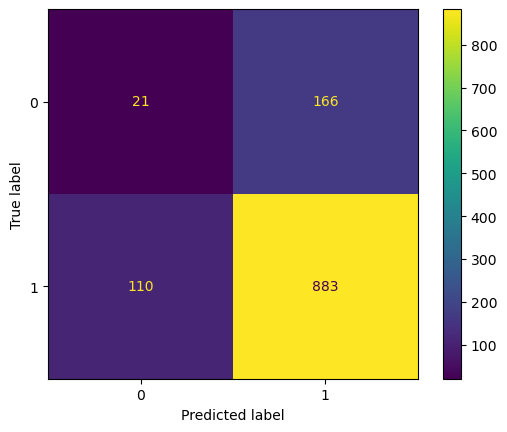

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# Train best Random Forest model on the full training data
best_rf.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_val_predictions = best_rf.predict(X_val_scaled)

# Confusion matrix and classification report
cm = confusion_matrix(y_val, y_val_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot()

print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_predictions))

In [34]:
# Predict on the test set (assuming test dataset is preprocessed)
test_scaled = test.copy()
test_scaled[numerical_cols] = scaler.transform(test_scaled[numerical_cols])
test_predictions = best_rf.predict(test_scaled.drop(columns=['Loan_ID']))

In [35]:
# Importing sample submission dataset
sample_submission=pd.read_csv("Sample Submission.csv")

In [36]:
# Add predictions to the sample submission
sample_submission['Loan_Status'] = test_predictions
print(sample_submission.head())

      ID  Loan_Status
0  70607            1
1  58412            1
2  88755            1
3  97271            1
4  70478            1


In [37]:
# Count the predictions in each class
print(sample_submission['Loan_Status'].value_counts())

Loan_Status
1    2251
0     277
Name: count, dtype: int64


In [38]:
print(train['Loan_Status'].value_counts())

Loan_Status
1    4913
0     985
Name: count, dtype: int64


In [39]:
from collections import Counter

# Check the balance of predicted classes on the validation set
predicted_class_distribution = Counter(y_val_predictions)
print("Predicted Class Distribution:", predicted_class_distribution)

# Check the balance of actual classes in the validation set
actual_class_distribution = Counter(y_val)
print("Actual Class Distribution:", actual_class_distribution)


Predicted Class Distribution: Counter({1: 1049, 0: 131})
Actual Class Distribution: Counter({1: 993, 0: 187})


In [40]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_val, y_val_predictions)
print("Accuracy Score on Validation Set:", accuracy)


Accuracy Score on Validation Set: 0.7661016949152543


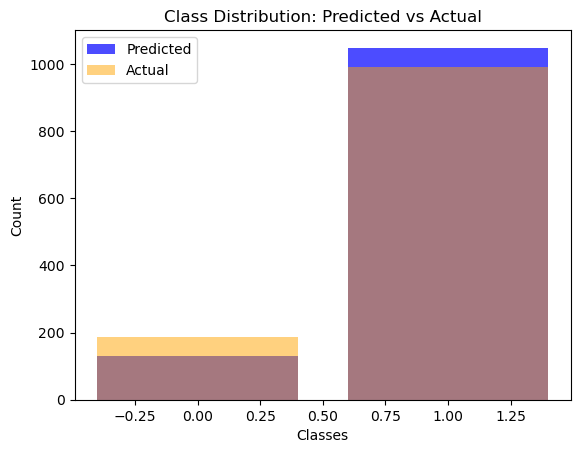

In [41]:
import matplotlib.pyplot as plt

# Plot predicted class distribution
plt.bar(predicted_class_distribution.keys(), predicted_class_distribution.values(), color='blue', alpha=0.7, label='Predicted')
plt.bar(actual_class_distribution.keys(), actual_class_distribution.values(), color='orange', alpha=0.5, label='Actual')
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Distribution: Predicted vs Actual")
plt.legend()
plt.show()


In [42]:
# Save the DataFrame to a CSV file
sample_submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'
